# **Grid Detection With OpenCV-Python**

## Grid Detection on a Sudoku Puzzle

In this computer vision technique, we are going to learn about detecting the Sudoku puzzle pattern using OpenCV. This technique will let us create augmented-reality-based experiences for our projects and allows us to familiarize with the techniques used for pattern detection using OpenCV, in specific, _**Grid Detection**_.

The code involves the following steps:

1. Downsampling the image.
2. Blurring it.
3. Applying adaptive threshold.
4. Finding biggest grid that will match the Sudoku puzzle.
5. Cropping the image.
6. Finding and drawing contours.

### Install OpenCV

In [1]:
# Step 1: Install OpenCV
!pip install opencv-python

### Import necessary packages and libraries

In [2]:
# Step 2: Import necessary packages and libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load the Sudoku Input mage

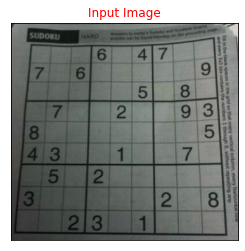

In [3]:
# Step 3: Load the Input Image
img = cv2.imread('E:/DevIncept/Intern-Work/int-cv-1/images/sudoku.jpg')
plt.title('Input Image', color='r'), plt.xticks([]), plt.yticks([])
plt.imshow(img)
plt.show()

### Downsample the image by converting it to Grayscale

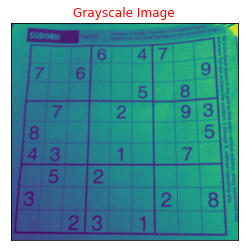

In [4]:
# Step 4: COnvert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.title('Grayscale Image', color='r'), plt.xticks([]), plt.yticks([])
plt.imshow(gray)
plt.show()

### Gaussian Blur to Remove Noise

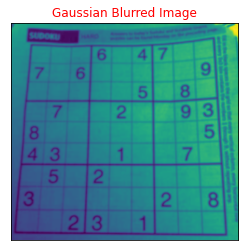

In [5]:
# Step 5: Apply Gaussian Blur to Remove Noise
blur = cv2.GaussianBlur(gray, (5,5), 0)
plt.title('Gaussian Blurred Image', color='r'), plt.xticks([]), plt.yticks([])
plt.imshow(blur)
plt.show()

The above technique is performed to make the extraction of Grid lines much easier.  

### Adaptive Thresholding

Now, we are going to apply _**Adaptive Thresholding**_. This step is crucial because normal thresholding thresholds the image as a whole, whereas adaptive threshold thresholds the image taking an optimum value for a local neighborhood.

The input image may have varying illumination levels, so a good choice for using a thresholding algorithm would be an adaptive threshold. It calculates the threshold level of many small windows in the image. This threshold level is then calculated using the mean level in the window.

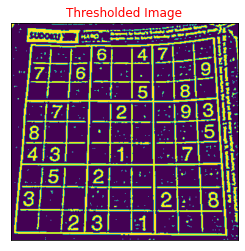

In [6]:
# Step 6: Apply Adaptive Thresholding
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
plt.title('Thresholded Image', color='r'), plt.xticks([]), plt.yticks([])
plt.imshow(thresh)
plt.show()

### Finding biggest grid that will match the Sudoku puzzle

Now it’s time to find the Sudoku borders from the thresholded image. We shall assume that the biggest square in the image is the Sudoku square. Therefore, we shall find out the biggest grid.

We shall start by finding out the contours in the thresholded image. After finding out the contours, we start to look at the biggest grid. The biggest grid will be the one that will have maximum area, so we will process all the contours to find the one that has the maximum area.

In [7]:
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

max_area = 0
c = 0
for i in contours:
    area = cv2.contourArea(i)
    if area > 1000:
        if area > max_area:
            max_area = area
            best_cnt = i
            img = cv2.drawContours(img, contours, c, (0, 255, 0), 3)
    c+=1

With only the borders of the Sudoku puzzle, the next thing is to create a mask image according to these borders, so that we will only detect the grids inside the borders.

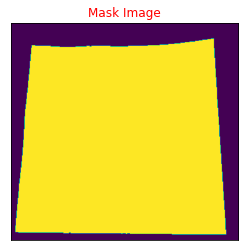

In [8]:
# Step 7: Masking the image
mask = np.zeros((gray.shape),np.uint8)
cv2.drawContours(mask,[best_cnt],0,255,-1)
cv2.drawContours(mask,[best_cnt],0,0,2)
plt.title('Mask Image', color='r'), plt.xticks([]), plt.yticks([])
plt.imshow(mask)
plt.show()

### Cropping the image

We then create another image that is same as the one that we are processing, and crop it according to the borders of the Sudoku puzzle.

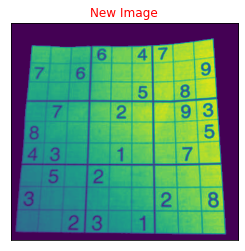

In [9]:
# Step 8: Cropping the image
output = np.zeros_like(gray)
output[mask == 255] = gray[mask == 255]
plt.title('New Image', color='r'), plt.xticks([]), plt.yticks([])
plt.imshow(output)
plt.show()

Then, we blur the image and apply the adaptive threshold on the new image.

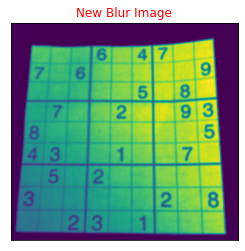

In [10]:
blur = cv2.GaussianBlur(output, (5,5), 0)
plt.title('New Blur Image', color='r'), plt.xticks([]), plt.yticks([])
plt.imshow(blur)
plt.show()

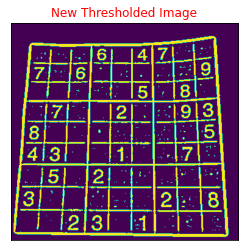

In [11]:
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
plt.title('New Thresholded Image', color='r'), plt.xticks([]), plt.yticks([])
plt.imshow(thresh)
plt.show()

### Finding and Drawing Contours

After that, we will find out the contours in the new image and draw these contours on that image.

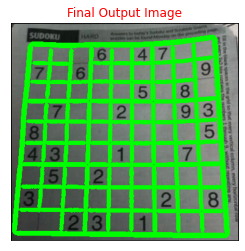

In [12]:
# Step 9: Finding and Drawing Contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

c = 0
for i in contours:
    area = cv2.contourArea(i)
    if area > 1000/2:
        cv2.drawContours(img, contours, c, (0, 255, 0), 3)
    c+=1

plt.title('Final Output Image', color='r'), plt.xticks([]), plt.yticks([])
plt.imshow(img)
plt.show()

Hence, we extracted the _Grid Lines_ from the Sudoku Puzzle using **Grid Detection** technique.

## Circle-based Grid Detection

Here, we are trying to extract grid lines from random _**circles**_ using Grid Detection technique.

### CODE

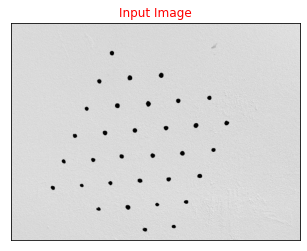

In [13]:
# Step 1: Load the Input Image
image = cv2.imread('E:/DevIncept/Intern-Work/int-cv-1/images/circle_input.jpg')
plt.title('Input Image', color='r'), plt.xticks([]), plt.yticks([])
plt.imshow(image)
plt.show()

In [14]:
# Step 2: Finding Grids on the centers
shape = (3, 11)
[isFound, centers] = cv2.findCirclesGrid(image, shape, flags = cv2.CALIB_CB_ASYMMETRIC_GRID + cv2.CALIB_CB_CLUSTERING)

In [15]:
isFound

True

In [16]:
# Step 3: Finding corners
_image_circles = image.copy()
cv2.drawChessboardCorners(_image_circles, (3, 11), centers, isFound)

array([[[225, 225, 225],
        [216, 216, 216],
        [217, 217, 217],
        ...,
        [226, 226, 226],
        [224, 224, 224],
        [227, 227, 227]],

       [[217, 217, 217],
        [219, 219, 219],
        [220, 220, 220],
        ...,
        [227, 227, 227],
        [225, 225, 225],
        [225, 225, 225]],

       [[213, 213, 213],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [229, 229, 229],
        [216, 216, 216],
        [225, 225, 225]],

       ...,

       [[212, 212, 212],
        [213, 213, 213],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [212, 212, 212],
        [223, 223, 223]],

       [[221, 221, 221],
        [216, 216, 216],
        [217, 217, 217],
        ...,
        [214, 214, 214],
        [217, 217, 217],
        [217, 217, 217]],

       [[218, 218, 218],
        [218, 218, 218],
        [215, 215, 215],
        ...,
        [215, 215, 215],
        [216, 216, 216],
        [220, 220, 220]]

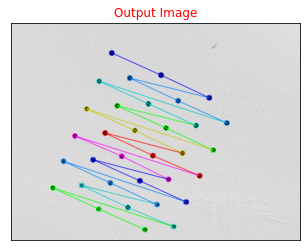

In [17]:
# Final Output Image
plt.title('Output Image', color='r'), plt.xticks([]), plt.yticks([])
plt.imshow(_image_circles)
plt.show()

Therefore, we successfully extracted the _Grid Lines_ from the random circles using **Circle-based Grid Detection** technique.